## Student: Arthur Testard
## Student id: 105022

# TTT4185 Machine learning for Speech technology

## Computer assigment 1: Speech analysis

This assignment assumes that the student has knowledge about short-time spectral estimation, linear prediction modeling and cepstral analysis. You should also know the concept of fundamental frequencies and formants.

Useful plotting commands from `matplotlib.pyplot`: `figure`, `plot`, `subplots`, `pcolormesh`

### Problem 1

In this problem we will look at a speech signal and do simple spectral analysis on the signal.

(a) Download the speech file `stry.wav` from Blackboard and load the file using `scipy.io.wavefile.read`. The speech represents the latter half of the English word "tapestry". The phonetic transcription is /s/ /t/ /r/ /iy/.
- Plot the signal.
- What is characteristic about the sounds /s/, /t/, /r/ and /iy/?
- Take a 40 millisecond subset of the vowel /iy/ and plot it.
- Find the fundamental frequency $f_0$ of the vowel.

In [2]:
import scipy.io.wavfile
Fs, data = scipy.io.wavfile.read('stry.wav')
print(Fs, len(data))

16000 7438


- We first plot the signal

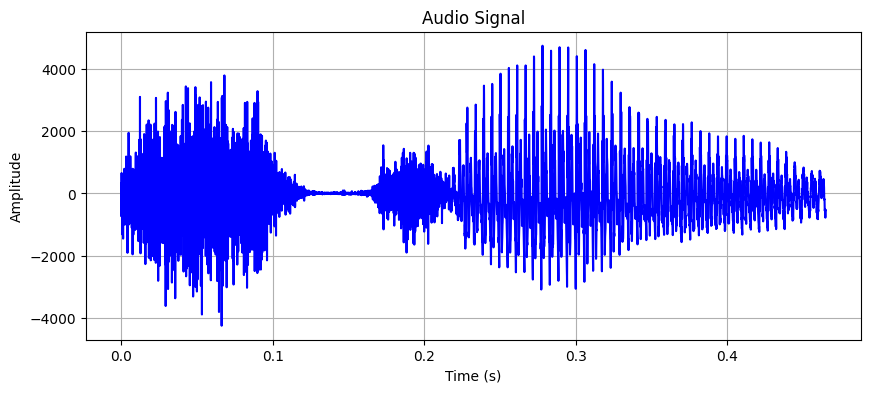

In [3]:
import matplotlib.pyplot as plt
import numpy as np

duration = len(data) / Fs
time = np.linspace(0, duration, len(data))

plt.figure(figsize=(10, 4))
plt.plot(time, data, color='b')
plt.title('Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

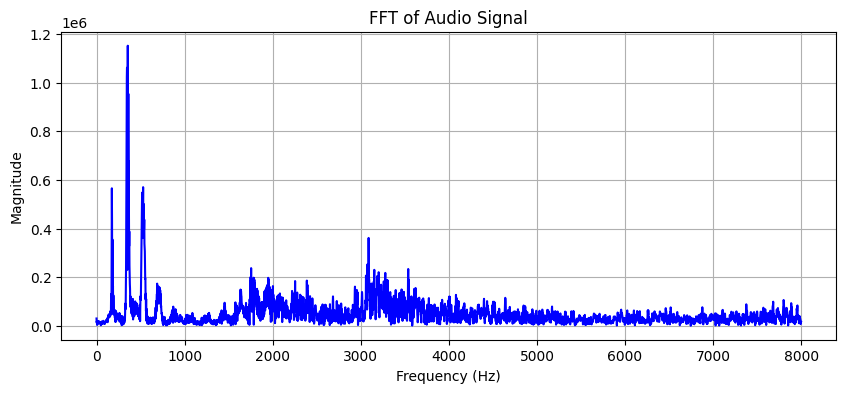

In [4]:
fft_data = np.fft.fft(data)
freqs = np.fft.fftfreq(len(fft_data), 1 / Fs)

magn_fft_data = np.abs(fft_data)

plt.figure(figsize=(10, 4))
plt.plot(freqs[:len(fft_data)//2], magn_fft_data[:len(fft_data)//2], color='b')
plt.title('FFT of Audio Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

- What is characteristic about the sounds /s/, /t/, /r/ and /iy/?

/s/ sound: very dense (high frequency), quite long and big amplitude. The vocal cords don't vibrate during its production.

/t/ sound: silence after the first sound, it's produced by completely blocking the airflow at the alveolar ridge and then releasing it abruptly. It can be relate to a Dirac signal.

/r/ sound: vowel-like sound

/iy/ sound: characterized by a pure vowel quality (low frequency)


- Take a 40 millisecond subset of the vowel /iy/ and plot it.

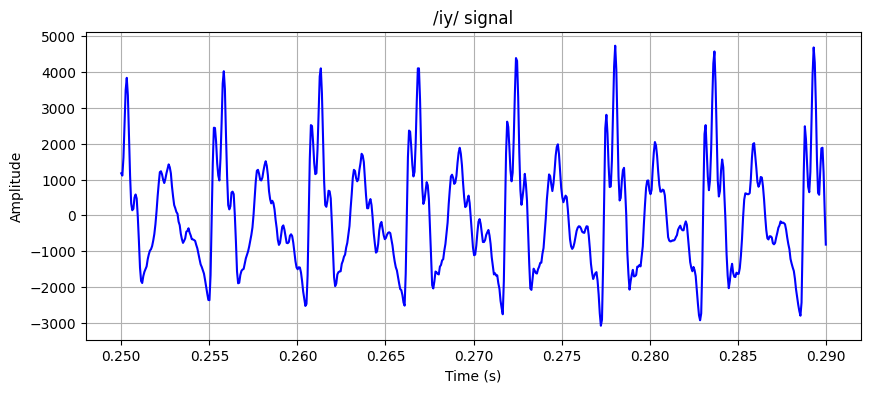

In [5]:
t0, dt = 0.25, 0.04
t1 = t0 + dt

iy_signal = data[int(t0 * Fs) : int(t1 * Fs)]
time = np.linspace(t0, t1, len(iy_signal))

plt.figure(figsize=(10, 4))
plt.plot(time, iy_signal, color='b')
plt.title('/iy/ signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

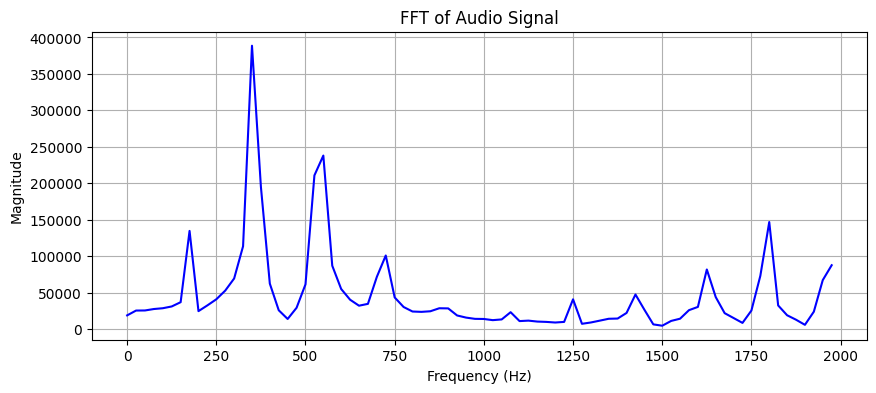

In [6]:
fft_iy = np.fft.fft(iy_signal)
freqs_iy = np.fft.fftfreq(len(fft_iy), 1 / Fs)
magn_fft_iy = np.abs(fft_iy)

plt.figure(figsize=(10, 4))
plt.plot(freqs_iy[:len(fft_iy) // 8], magn_fft_iy[:len(fft_iy)// 8], color='b')
plt.title('FFT of Audio Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

- Find the fundamental frequency $f_0$ of the vowel.

In [7]:
import scipy.signal as signal

peaks, properties = signal.find_peaks(magn_fft_iy, prominence=1, height=1e5)

# The fundamental frequency correspond to the first value 
# of the list because it corresponds to the first peak where 
# the magnitude is higher than 100 000

amp = properties['prominences'][0] 
freq_iy_index = peaks[0]

print("Estimated fundamental frequency (f0):", freqs_iy[freq_iy_index], "Hz")

Estimated fundamental frequency (f0): 175.0 Hz


(b) Spectral analysis
- Estimate the spectrum of the vowel using an FFT of length 1024. Plot the spectrum expressed in dBs ($20 \log_{10}(x)$) as a function of frequency.
- Multiply the signal by a Hamming window and repeat the last operation.
- Explain the difference between the two spectra.
- Estimate the fundamental frequency $f_0$ using the spectrum, and compare the result to what you got in 1a)
- Roughly estimate the two first formant frequencies.

Useful Python functions: `numpy.fft.fft`, `numpy.abs`, `scipy.signal.hamming`.

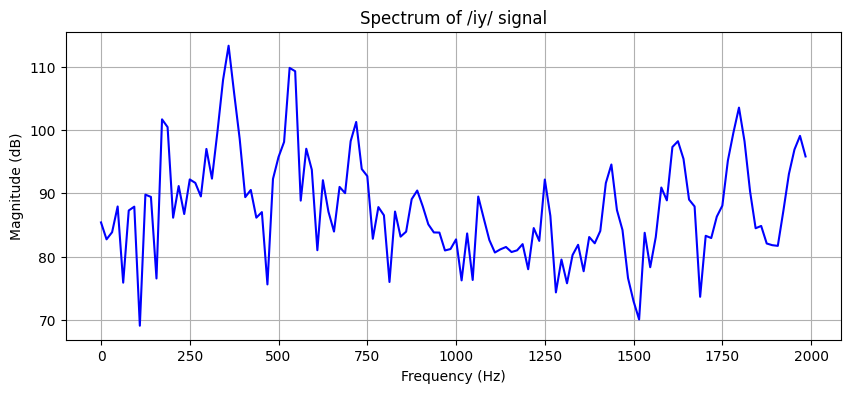

In [8]:
fft_iy = np.fft.fft(iy_signal, n=1024)

freqs_iy = np.fft.fftfreq(len(fft_iy), 1 / Fs)
magn_db_iy = 20 * np.emath.log10(np.abs(fft_iy))

plt.figure(figsize=(10, 4))
plt.plot(freqs_iy[:len(fft_iy) // 8], magn_db_iy[:len(fft_iy) // 8], color='b')
plt.title('Spectrum of /iy/ signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.show()

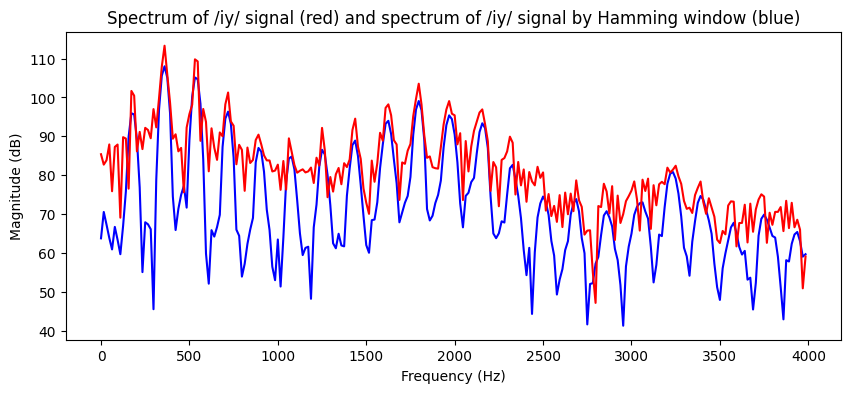

In [9]:
iy_hamming_signal = iy_signal * signal.hamming(len(iy_signal))

fft_iy_hamming = np.fft.fft(iy_hamming_signal, 1024)
freqs_iy_hamming = np.fft.fftfreq(len(fft_iy_hamming), 1 / Fs)
magn_db_hamming = 20 * np.log10(np.abs(fft_iy_hamming))

plt.figure(figsize=(10, 4))
plt.plot(freqs_iy_hamming[:len(fft_iy_hamming)//4], magn_db_hamming[:len(fft_iy_hamming)//4], color='b')
plt.plot(freqs_iy_hamming[:len(fft_iy)//4], magn_db_iy[:len(fft_iy)//4], color='r')
plt.title('Spectrum of /iy/ signal (red) and spectrum of /iy/ signal by Hamming window (blue)')
plt.xlabel('Frequency (Hz)') 
plt.ylabel('Magnitude (dB)')
plt.show()


When a Hamming window is applied to the signal before performing the FFT, the signal becomes thinner towards the edges. This thinning reduces the leakage of spectral energy from one frequency component to another. As a result, the spectrum with the Hamming window has narrower peaks and weaker sidelobes than the spectrum without.

In [10]:
peaks_hamming, properties_hamming = signal.find_peaks(magn_db_hamming, prominence=1, height=90)

print("Estimated fundamental frequency (f0):", freqs_iy_hamming[peaks_hamming[0]], "Hz")

Estimated fundamental frequency (f0): 171.875 Hz


We obtain a fundamental frequency a bit different than the previous one. It can be explain by the spreading of the frequencies made by the hamming window.

In [11]:
peak_indices = np.argsort(magn_db_hamming[:len(magn_db_hamming) // 2])[::-1][1:]

print(f"First formant frequency: {freqs_iy_hamming[peak_indices[0]]} Hz")
print(f"Second formant frequency: {freqs_iy_hamming[peak_indices[1]]} Hz")

First formant frequency: 343.75 Hz
Second formant frequency: 531.25 Hz


(c) AR modeling
- Compute the coefficients of an AR model (linear prediction coefficients) with order 4, 8, 16 and 50, based on the vowel.
- Estimate the spectrum for each of the model orders. Plot the spectrum in dBs as a function of frequency.
- Compare your results with the spectrum from 1b). Which model order yields the "best" spectral envelope? What happens if the model order is too high or too low?
- Why is it not possible to estimate the fundamental frequency based on the LP model?

Useful Python functions: `pysptk.sptk.lpc`, `scipy.signal.freqz`. Check the documentation of the sptk package https://netix.dl.sourceforge.net/project/sp-tk to know which parameters are returned by the `lpc` function, and what model they correspond to.

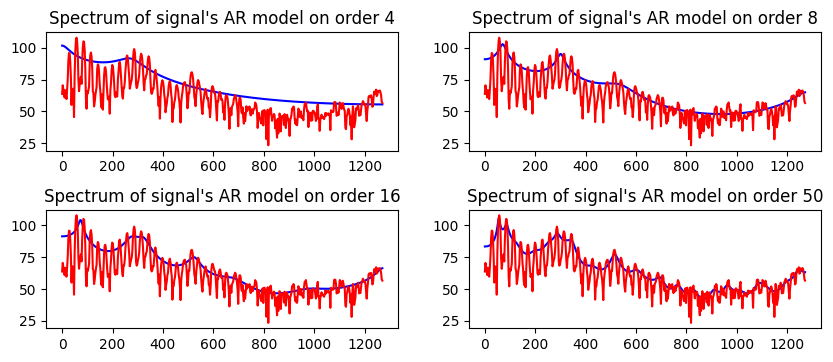

In [12]:
import pysptk

model_orders = [4, 8, 16, 50]
lpccoeffs = [[ pysptk.sptk.lpc(iy_hamming_signal, k)[0], pysptk.sptk.lpc(iy_hamming_signal, k)[1:] ] for k in model_orders]

wh = [ scipy.signal.freqz(b=lpccoeffs[k][0], a=np.concatenate((np.ones(1,), lpccoeffs[k][1])), worN=len(magn_db_iy)//2,fs=Fs) for k in range(4) ]

magnitude_spectrum_db = [ 20 * np.log10(np.abs(wh[k][1])) for k in range(4) ]

plt.figure(figsize=(10, 4))
for k in range(len(magnitude_spectrum_db)):
    plt.subplot(2, 2, k + 1)
    plt.title(f"Spectrum of signal's AR model on order {model_orders[k]}")
    plt.plot(wh[k][0] / ( 2 * np.pi ), magnitude_spectrum_db[k], color='b')
    plt.plot(wh[k][0] / ( 2 * np.pi ), magn_db_hamming[:len(magn_db_hamming)//2], color='r')

plt.subplots_adjust(top=0.85, hspace=0.5)

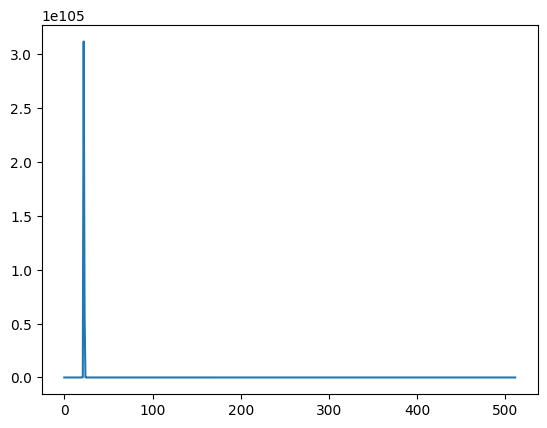

In [16]:
plt.plot(np.exp(magnitude_spectrum_db[3] * np.log(10)))

Order 16 match the best with the spectral enveloppe (order 8 is not so bad though but we miss the pole around 1000Hz). If the order is too low, the model skips a lot of poles and if the order is too high we might have too much poles, and would have maybe even more than the original one. Zeros may appear too. 

It is not possible to have the fundamental frequency based on the LPC model it is supposed to only represent the shape of the spectrum, and $f_0$ is not present on it.

(d) Use `scipy.signal.spectrogram` to create a spectrogram of the entire speech signal. Try to generate both wide- and narrow-band spectrograms by adjusting the window lengths and overlaps. Which characteristic traits of the speech sounds /s/, /t/, /r/ and /iy/ can you see from the spectrogram?

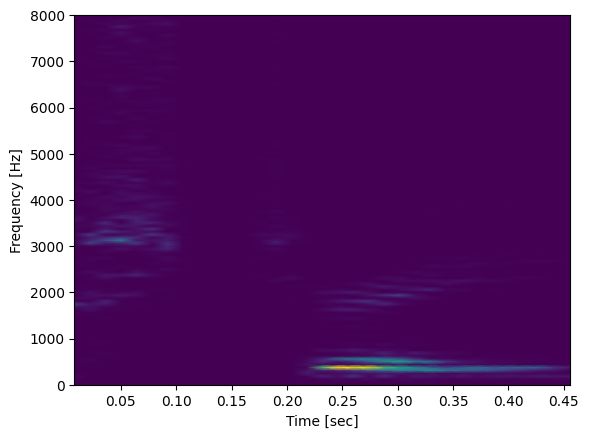

In [ ]:
f, t, Sxx = scipy.signal.spectrogram(data, fs=Fs)

plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

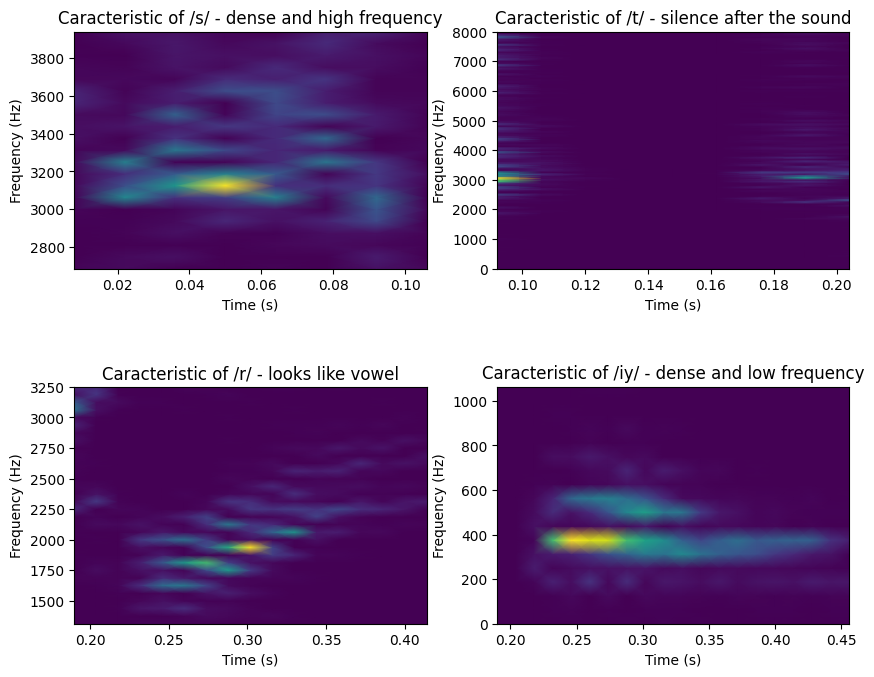

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
t0, t1 = 0, len(t) // 4
f0, f1 = len(f) // 3, len(f) // 2
plt.pcolormesh(t[t0:t1], f[f0:f1], Sxx[f0:f1, t0:t1], shading='gouraud')
plt.title('Caracteristic of /s/ - dense and high frequency')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')

plt.subplot(2, 2, 2)
t0, t1 = len(t) // 5 ,  11 * len(t) // 24
f0, f1 = 0, len(f)
plt.pcolormesh(t[t0:t1], f[f0:f1], Sxx[f0:f1, t0:t1], shading='gouraud')
plt.title('Caracteristic of /t/ - silence after the sound')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')

plt.subplot(2, 2, 3)
t0, t1 = 5 * len(t) // 12, 11 * len(t) // 12
f0, f1 = len(f) // 6, 5 * len(f) // 12
plt.pcolormesh(t[t0:t1], f[f0:f1], Sxx[f0:f1, t0:t1], shading='gouraud')
plt.title('Caracteristic of /r/ - looks like vowel')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')

plt.subplot(2, 2, 4)
t0, t1 = 5 * len(t) // 12, len(t)
f0, f1 = 0, len(f) // 7
plt.pcolormesh(t[t0:t1], f[f0:f1], Sxx[f0:f1, t0:t1], shading='gouraud')
plt.title('Caracteristic of /iy/ - dense and low frequency')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')

plt.subplots_adjust(top=0.85, hspace=0.5)

### Problem 2
In this problem we look at the cepstrum and deconvolution

(a) Compute and plot the real cepstrum of the vowel from problem 1a).

/Library/Python/3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


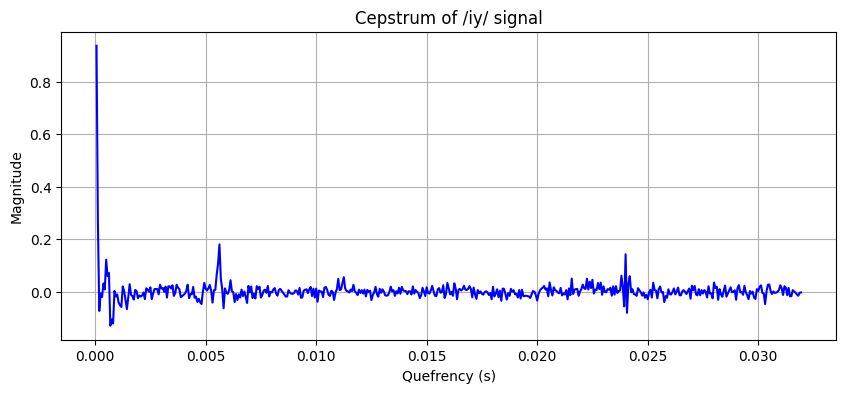

In [ ]:
log_fft_iy = np.log(np.abs(fft_iy))
iy_cepstrum = np.fft.ifft(log_fft_iy)

quef_sample = freqs_iy[1] - freqs_iy[0]
iy_quefrency =  np.fft.fftfreq(len(iy_cepstrum), quef_sample)

plt.figure(figsize=(10, 4))
plt.plot(iy_quefrency[1:len(iy_quefrency) // 2], iy_cepstrum[1:len(iy_cepstrum) // 2], color='b')
plt.title('Cepstrum of /iy/ signal')
plt.xlabel('Quefrency (s)') 
plt.ylabel('Magnitude')
plt.grid()
plt.show()

(b) Use the cepstrum to compute the fundamental frequency $f_0$. Compare your results with those obtained in problem 1).

In [ ]:
indexs, _ = signal.find_peaks(10 * np.real(iy_cepstrum[:len(iy_cepstrum) // 2]), prominence=1, height=1)
print(f"Estimated fundamental frequency (f0) from the cepstrum: {1 / iy_quefrency[indexs[1]]}")

Estimated fundamental frequency (f0) from the cepstrum: 177.77777777777777


This result is a bit different from the original one but has the same order of size.

(c) In this subproblem you will use the cepstrum to estimate the spectral envelope
- Use liftering to extract the part of the ceptrum that represents the spectral envelope.
- Plot the spectral envelope as a function of frequency, and compare the result with the results from problem 1).

Hint 1: Remember that the cepstrum of a real signal is symmetric, so the liftered signal must be symmetric as well.

Hint 2: The FFT of a real, symmetric signal is real, but due to round-off errors small imaginary noise may occur. Use `np.real` to get to the real part of the liftered log-spectrum.

/Users/arthurtestard/Library/Python/3.9/lib/python/site-packages/pysptk/util.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  lambda v: input_arg.astype(np.float64) if v[0] == 0 else v[1],


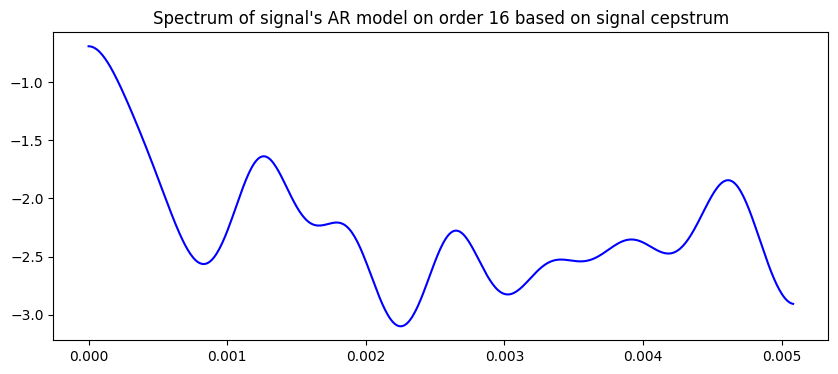

In [ ]:
iy_lifted = iy_cepstrum * signal.hamming(len(iy_cepstrum))

fft_iy_lifted = np.fft.fft(iy_lifted, n=1024)

order = 16
K, lpccoeffs = pysptk.sptk.lpc(iy_lifted, order)[0], pysptk.sptk.lpc(iy_lifted, order)[1:]
w, h = scipy.signal.freqz(b=K, a=np.concatenate((np.ones(1,), lpccoeffs)), worN=len(iy_lifted)//2,fs=1/quef_sample)

magn_spec_db = 20 * np.log10(np.abs(h))

plt.figure(figsize=(10, 4))
plt.title(f"Spectrum of signal's AR model on order {order} based on signal cepstrum")
plt.plot( w / ( 2 * np.pi ), magn_spec_db, color='b')
